In [1]:
%matplotlib inline
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

import keras
from keras.preprocessing import image

C:\Users\DTY\Anaconda3\envs\PythonData\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import load_model

In [3]:
# Read the dataset
bee_data = pd.read_csv(os.path.join('..', 'PollenDataset','pollen_data.csv'))
bee_data.head()

,Unnamed: 0,filename,pollen_carrying
0,0,P10057-125r.jpg,1
1,1,P57380-120r.jpg,1
2,2,NP63671-221r.jpg,0
3,3,NP53776-47r.jpg,0
4,4,NP13382-201r.jpg,0


### Bee images

In [4]:
# Function to load the images of bees and their identification (result) in respective arrays 
def x_and_y(bee_data):
    img_list = []
    pollen_list = []
    data = []
    for image_file, pollen_info in zip(bee_data['filename'], bee_data['pollen_carrying']):
        image_path = os.path.join("..", 'PollenDataset', 'images', image_file)
        img = image.load_img(image_path, target_size= (32, 32))
        x_img = image.img_to_array(img)
        img_list.append(x_img)
        pollen_list.append(pollen_info)
    
    return (np.array(img_list, dtype="float") / 255.0), np.array(pollen_list)

In [5]:
# X and y
X, y= x_and_y(bee_data)
print(X.shape, y.shape)

(714, 32, 32, 3) (714,)


In [6]:
# Split the data into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(571, 32, 32, 3) (143, 32, 32, 3) (571,) (143,)


In [7]:
# CNN Model

cnn = Sequential()

cnn.add(Conv2D(32, (3,3), padding='same', input_shape=(32,32,3), activation = 'relu'))
cnn.add(Conv2D(64, (3,3), padding='same', activation = 'relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128, (3,3), padding='same', activation = 'relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(128, (3,3), padding='same', activation = 'relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())     

cnn.add(Dense(1024, activation = 'relu'))
cnn.add(Dropout(0.5))

cnn.add(Dense(1, activation = 'sigmoid'))

cnn.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         147584    
__________

In [8]:
# Fit (train) the model
H = cnn.fit(
    X_train,
    y_train,
    epochs=50,
    shuffle=True,
    verbose=2
)

Epoch 1/50
 - 13s - loss: 0.8107 - acc: 0.5131
Epoch 2/50
 - 12s - loss: 0.6597 - acc: 0.6357
Epoch 3/50
 - 12s - loss: 0.5872 - acc: 0.7093
Epoch 4/50
 - 11s - loss: 0.3831 - acc: 0.8476
Epoch 5/50
 - 12s - loss: 0.2645 - acc: 0.8722
Epoch 6/50
 - 11s - loss: 0.1966 - acc: 0.9177
Epoch 7/50
 - 12s - loss: 0.1592 - acc: 0.9370
Epoch 8/50
 - 11s - loss: 0.1434 - acc: 0.9422
Epoch 9/50
 - 12s - loss: 0.1192 - acc: 0.9457
Epoch 10/50
 - 11s - loss: 0.0921 - acc: 0.9720
Epoch 11/50
 - 12s - loss: 0.0812 - acc: 0.9650
Epoch 12/50
 - 11s - loss: 0.0619 - acc: 0.9807
Epoch 13/50
 - 12s - loss: 0.0443 - acc: 0.9895
Epoch 14/50
 - 11s - loss: 0.0477 - acc: 0.9825
Epoch 15/50
 - 11s - loss: 0.0259 - acc: 0.9912
Epoch 16/50
 - 11s - loss: 0.0320 - acc: 0.9842
Epoch 17/50
 - 12s - loss: 0.0413 - acc: 0.9860
Epoch 18/50
 - 11s - loss: 0.0220 - acc: 0.9930
Epoch 19/50
 - 12s - loss: 0.0323 - acc: 0.9842
Epoch 20/50
 - 11s - loss: 0.0110 - acc: 0.9930
Epoch 21/50
 - 12s - loss: 0.0180 - acc: 0.9912
E

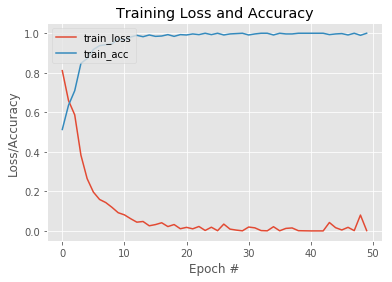

In [18]:
# Plot the Training loss and accuracy result
plt.style.use("ggplot")
plt.figure()
N = 50
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.savefig("Model accuracy.png")
plt.show()

In [10]:
# Evaluate the model using the test data 
model_loss, model_accuracy = cnn.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.3609125912059229, Accuracy: 0.951048951048951


### Save the model

In [11]:
# Save the model
cnn.save("pollen_carrying_bee_cnn.h5")

### Load the model

In [12]:
model = load_model("pollen_carrying_bee_cnn.h5")

### Making Predictions

In [13]:
new_path = os.path.join("..", 'PollenDataset', 'images', "P9755-119r.jpg")
new_image = image.load_img(new_path, target_size= (32, 32))
new_img = image.img_to_array(new_image)
new_img = new_img.reshape((1,) + new_img.shape) 
new_img.shape

(1, 32, 32, 3)

In [24]:
yclass = model.predict_classes(new_img)[0][0]

if yclass == 1:
    print("The bee is carrying pollen.")
else:
    print("The bee is not carrying pollen.")

The bee is carrying pollen.
